In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Data Overview

In [42]:
df = pd.read_json('../data/IMDB_reviews.json', lines=True)

In [53]:
df_details = pd.read_json('../data/IMDB_movie_details.json', lines=True)

In [43]:
df.head()

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary
0,10 February 2006,tt0111161,ur1898687,True,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.
1,6 September 2000,tt0111161,ur0842118,True,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.
2,3 August 2001,tt0111161,ur1285640,True,I believe that this film is the best story eve...,8,The best story ever told on film
3,1 September 2002,tt0111161,ur1003471,True,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?
4,20 May 2004,tt0111161,ur0226855,True,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted"


In [54]:
df_details.head()

,movie_id,plot_summary,duration,genre,rating,release_date,plot_synopsis
0,tt0105112,"Former CIA analyst, Jack Ryan is in England wi...",1h 57min,"[Action, Thriller]",6.9,1992-06-05,"Jack Ryan (Ford) is on a ""working vacation"" in..."
1,tt1204975,"Billy (Michael Douglas), Paddy (Robert De Niro...",1h 45min,[Comedy],6.6,2013-11-01,Four boys around the age of 10 are friends in ...
2,tt0243655,"The setting is Camp Firewood, the year 1981. I...",1h 37min,"[Comedy, Romance]",6.7,2002-04-11,
3,tt0040897,"Fred C. Dobbs and Bob Curtin, both down on the...",2h 6min,"[Adventure, Drama, Western]",8.3,1948-01-24,Fred Dobbs (Humphrey Bogart) and Bob Curtin (T...
4,tt0126886,Tracy Flick is running unopposed for this year...,1h 43min,"[Comedy, Drama, Romance]",7.3,1999-05-07,Jim McAllister (Matthew Broderick) is a much-a...


In [44]:
df.shape

(573913, 7)

In [45]:
df['movie_id'].unique().shape

(1572,)

In [46]:
df['user_id'].unique().shape

(263407,)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573913 entries, 0 to 573912
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   review_date     573913 non-null  object
 1   movie_id        573913 non-null  object
 2   user_id         573913 non-null  object
 3   is_spoiler      573913 non-null  bool  
 4   review_text     573913 non-null  object
 5   rating          573913 non-null  int64 
 6   review_summary  573913 non-null  object
dtypes: bool(1), int64(1), object(5)
memory usage: 26.8+ MB


In [48]:
df.describe()

,rating
count,573913.000000
mean,6.954254
std,2.956295
min,1.000000
25%,5.000000
50%,8.000000
75%,10.000000
max,10.000000


In [49]:
# Number of reviews for each movie
df['movie_id'].value_counts()

movie_id
tt0468569    4845
tt0111161    4361
tt0167260    2729
tt0137523    2480
tt0068646    2137
             ... 
tt0107719      12
tt6294822      11
tt0104014       5
tt0201265       4
tt0114142       2
Name: count, Length: 1572, dtype: int64

In [50]:
# Duplicate reviews
df.duplicated().sum()

0

/tmp/ipykernel_7678/1551149072.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_movies.values, y=top_movies.index, palette='viridis')


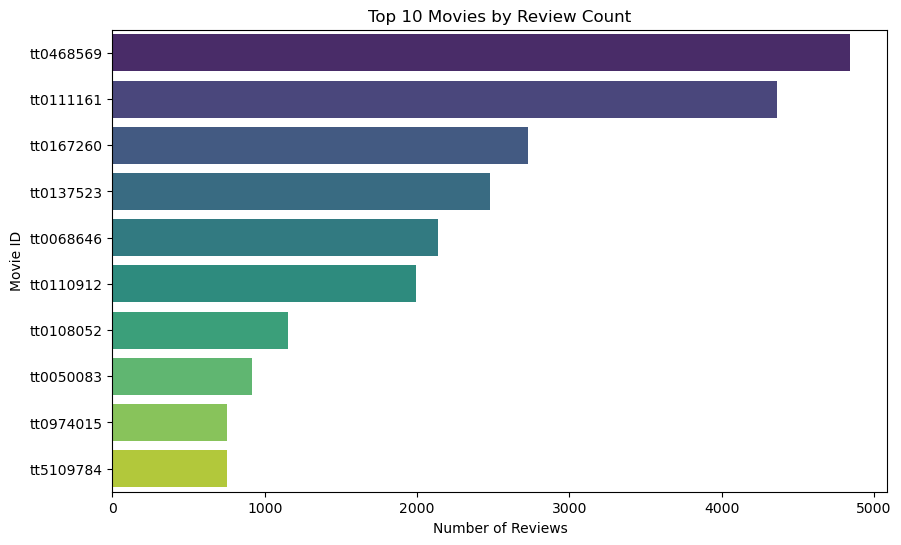

/tmp/ipykernel_7678/1551149072.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ratings.values, y=avg_ratings.index, palette='coolwarm')


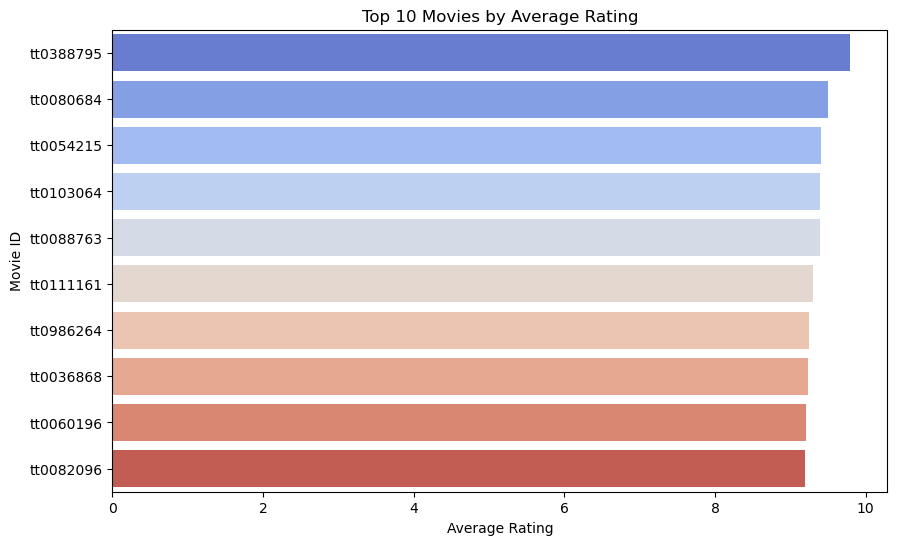

In [52]:
# Top movies by review count
top_movies = df['movie_id'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_movies.values, y=top_movies.index, palette='viridis')
plt.title('Top 10 Movies by Review Count')
plt.xlabel('Number of Reviews')
plt.ylabel('Movie ID')
plt.show()

# Top movies by average rating
avg_ratings = df.groupby('movie_id')['rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_ratings.values, y=avg_ratings.index, palette='coolwarm')
plt.title('Top 10 Movies by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Movie ID')
plt.show()


/tmp/ipykernel_7678/2025968501.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_users.values, y=top_users.index, palette='viridis')


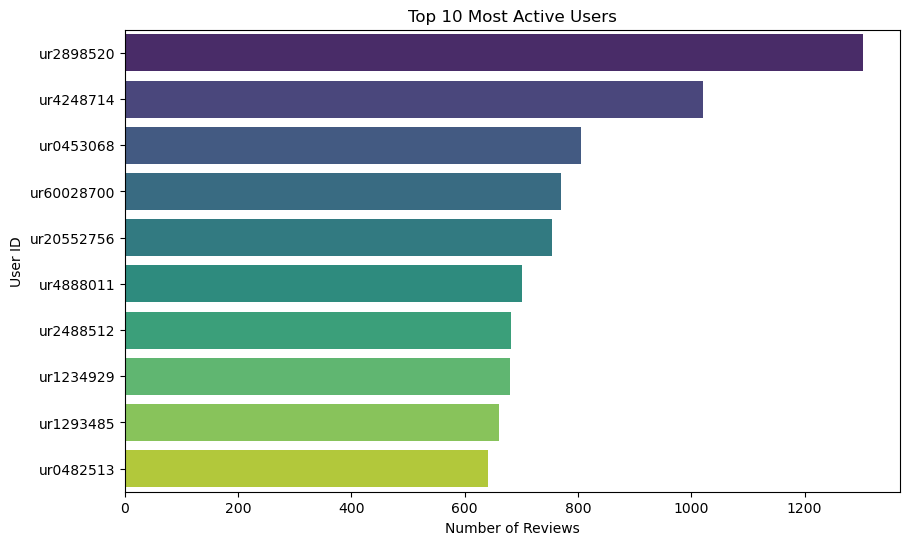

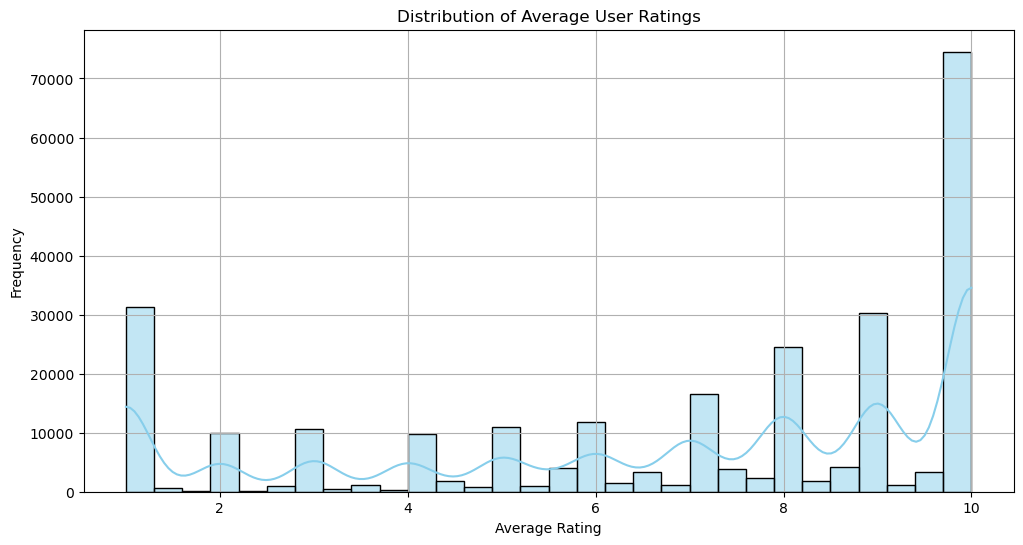

In [55]:
# Most active users
top_users = df['user_id'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_users.values, y=top_users.index, palette='viridis')
plt.title('Top 10 Most Active Users')
plt.xlabel('Number of Reviews')
plt.ylabel('User ID')
plt.show()

# User average rating distribution
avg_user_ratings = df.groupby('user_id')['rating'].mean()

plt.figure(figsize=(12, 6))
sns.histplot(avg_user_ratings, bins=30, kde=True, color='skyblue')
plt.title('Distribution of Average User Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.grid()
plt.show()


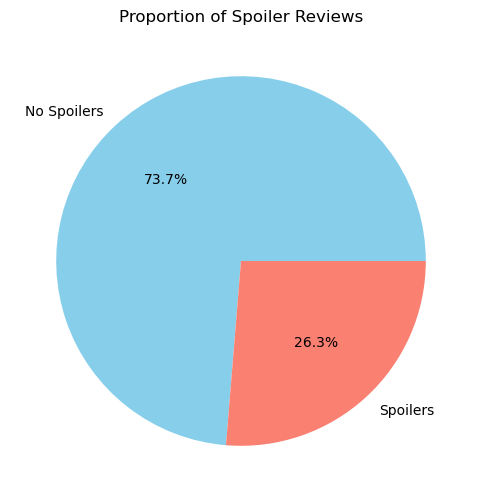

/tmp/ipykernel_7678/2422565968.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_spoiler', y='rating', data=df, palette='coolwarm')


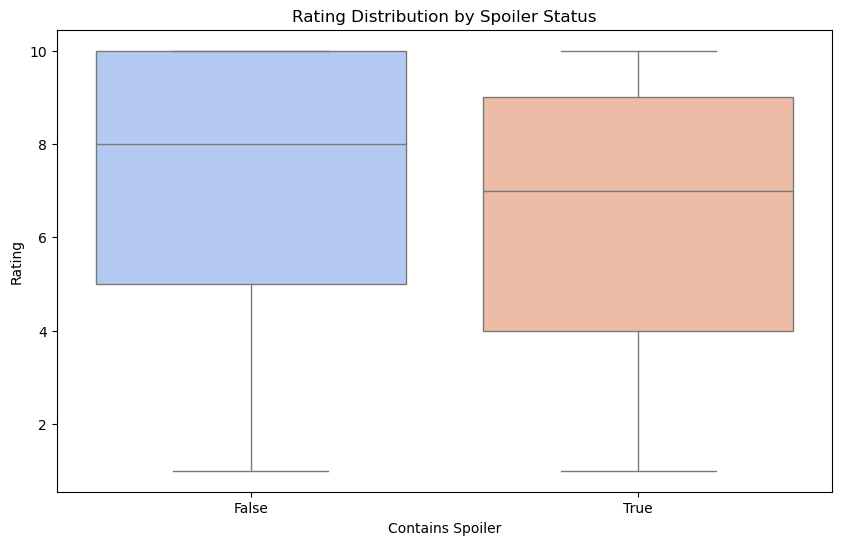

In [56]:
# Proportion of spoiler reviews
spoiler_counts = df['is_spoiler'].value_counts()

plt.figure(figsize=(8, 6))
spoiler_counts.plot(kind='pie', autopct='%1.1f%%', labels=['No Spoilers', 'Spoilers'], colors=['skyblue', 'salmon'])
plt.title('Proportion of Spoiler Reviews')
plt.ylabel('')
plt.show()

# Ratings by spoiler status
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_spoiler', y='rating', data=df, palette='coolwarm')
plt.title('Rating Distribution by Spoiler Status')
plt.xlabel('Contains Spoiler')
plt.ylabel('Rating')
plt.show()


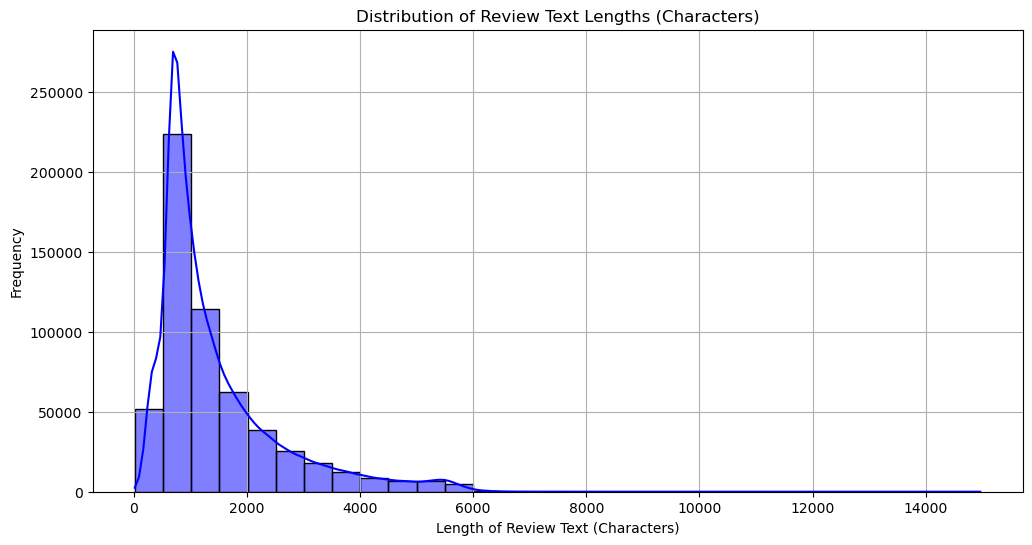

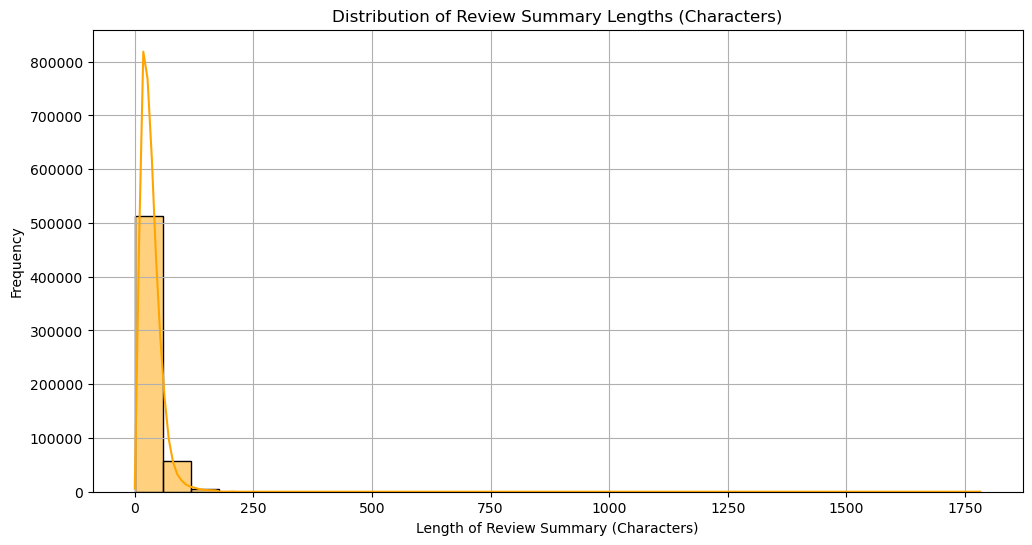

/tmp/ipykernel_7678/3142120361.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rating', y='review_text_length', data=df, palette='coolwarm')


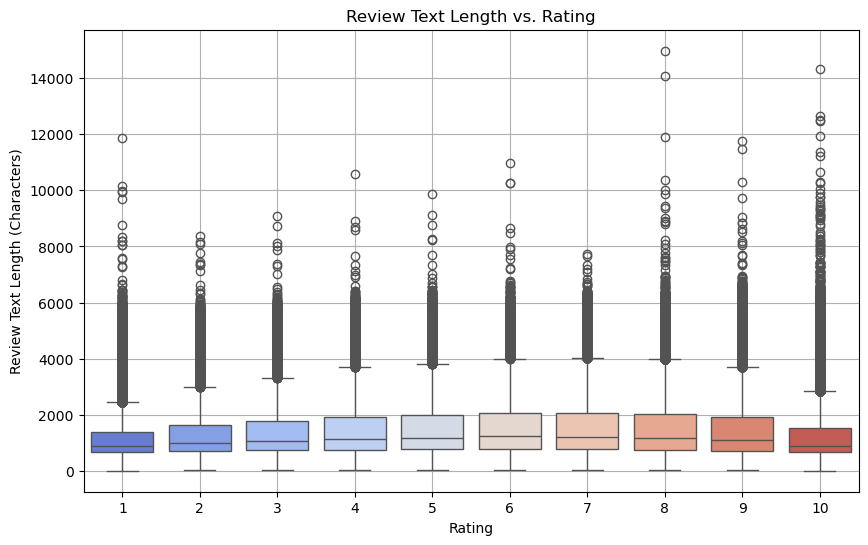

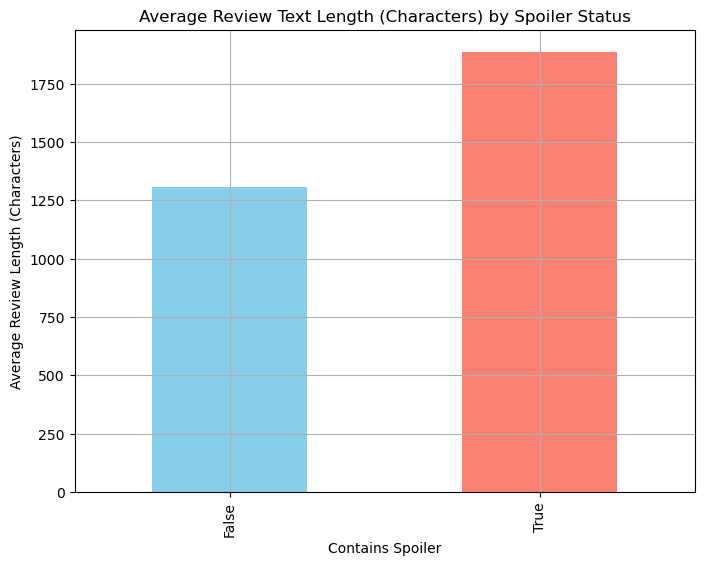

In [60]:
# Add review length columns (character count)
df['review_text_length'] = df['review_text'].apply(len)
df['review_summary_length'] = df['review_summary'].apply(len)

# Add review word count
df['review_text_word_count'] = df['review_text'].apply(lambda x: len(x.split()))
df['review_summary_word_count'] = df['review_summary'].apply(lambda x: len(x.split()))

# 1. Distribution of review text lengths (characters)
plt.figure(figsize=(12, 6))
sns.histplot(df['review_text_length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Review Text Lengths (Characters)')
plt.xlabel('Length of Review Text (Characters)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# 2. Distribution of review summary lengths (characters)
plt.figure(figsize=(12, 6))
sns.histplot(df['review_summary_length'], bins=30, kde=True, color='orange')
plt.title('Distribution of Review Summary Lengths (Characters)')
plt.xlabel('Length of Review Summary (Characters)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# 3. Relationship between review text length and rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='review_text_length', data=df, palette='coolwarm')
plt.title('Review Text Length vs. Rating')
plt.xlabel('Rating')
plt.ylabel('Review Text Length (Characters)')
plt.grid()
plt.show()

# 4. Average review text length for spoiler vs. non-spoiler
avg_length_spoiler = df.groupby('is_spoiler')['review_text_length'].mean()

plt.figure(figsize=(8, 6))
avg_length_spoiler.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Average Review Text Length (Characters) by Spoiler Status')
plt.xlabel('Contains Spoiler')
plt.ylabel('Average Review Length (Characters)')
plt.grid()
plt.show()


/tmp/ipykernel_7678/2011122111.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(spoilers, color='red', label='Spoilers', shade=False, bw_adjust=1)
/tmp/ipykernel_7678/2011122111.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(non_spoilers, color='blue', label='Non-Spoilers', shade=False, bw_adjust=1)


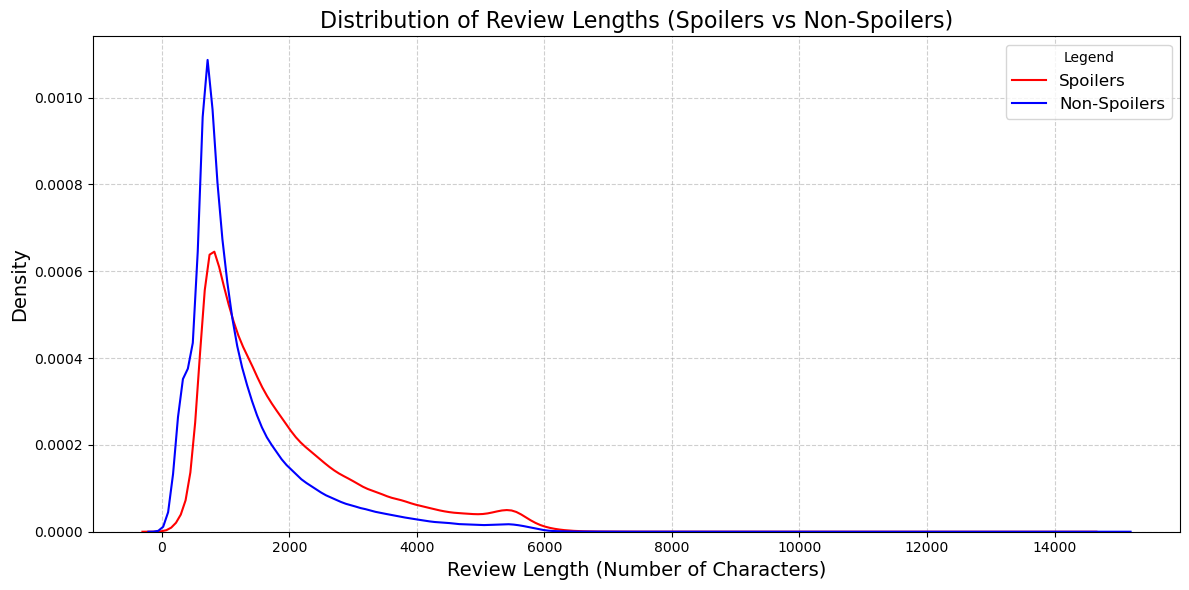

In [65]:
spoilers = df[df['is_spoiler'] == True]['review_text_length']
non_spoilers = df[df['is_spoiler'] == False]['review_text_length']
plt.figure(figsize=(12, 6))

sns.kdeplot(spoilers, color='red', label='Spoilers', shade=False, bw_adjust=1)

sns.kdeplot(non_spoilers, color='blue', label='Non-Spoilers', shade=False, bw_adjust=1)

plt.title('Distribution of Review Lengths (Spoilers vs Non-Spoilers)', fontsize=16)
plt.xlabel('Review Length (Number of Characters)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(title='Legend', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()